In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pydot
import pydotplus
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns
from IPython.display import Image  
from sklearn.externals.six import StringIO # creio que a versão de minha biblioteca está errada, mas não tive tempo de corrigir.
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
import pydot

ModuleNotFoundError: No module named 'sklearn.grid_search'

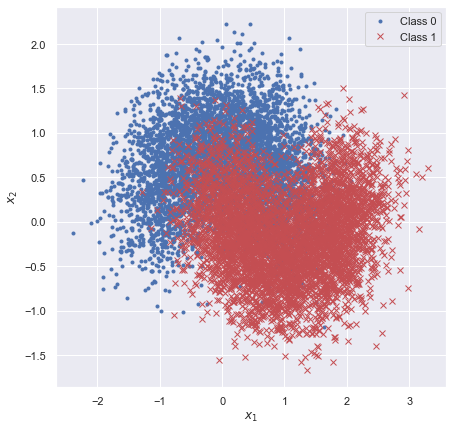

In [34]:
x, y = make_moons(n_samples = 10000, noise = 0.4, random_state=42)
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure(figsize=(7,7))
plt.plot(x[idx0,0], x[idx0,1], '.', label='Class 0')
plt.plot(x[idx1,0], x[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [35]:
# Split array into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)

In [36]:
param_grid = [{'criterion': ['gini', 'entropy'], 'max_depth': [None, 1, 2, 5, 10, 15, 25], 'max_leaf_nodes': [None, 2, 5, 10, 15, 25, 50, 100]}]
DTC = DecisionTreeClassifier()

clf = GridSearchCV(DTC, param_grid, cv=5, verbose=3, n_jobs=-1)
clf.fit(x, y)

print(clf.best_params_)
print(clf.best_score_)

NameError: name 'GridSearchCV' is not defined

In [23]:
DTC = DecisionTreeClassifier(criterion='gini', max_depth = None, max_leaf_nodes = 25)

# Fit the classifier on the training features and labels.
DTC.fit(x_train, y_train)

# Use the trained classifier to predict labels for the test features.
y_pred = DTC.predict(x_test)

# Calculate and return the accuracy on the test data 
accuracy = accuracy_score(y_test, y_pred)

print('accuracy: ',accuracy)

accuracy:  0.8648


In [24]:
dot_data = StringIO()  
tree.export_graphviz(DTC, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

NameError: name 'StringIO' is not defined

In [25]:
# Step size in the mesh.
h = .02 

# Create color maps
cmap_light = ListedColormap(['red', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

plt.figure(figsize=(5, 5))
# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points.
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title("2-Class classification")

plt.show()

NameError: name 'clf' is not defined

<Figure size 360x360 with 0 Axes>

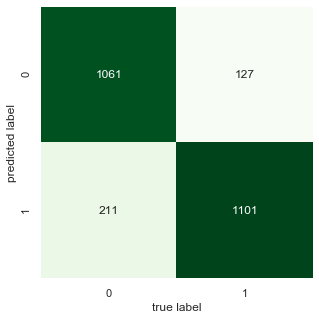

In [26]:
# Plot the confusion matrix.
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y_test, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Greens")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [1]:
# Getting the probabilities for each class.
y_prob = clf.predict_proba(x_test)

# Compute ROC curve and ROC area for each class.
plt.figure(figsize=(8, 8))

fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
# Plotting ROC curve.
lw = 2
plt.plot(fpr, tpr, color='darkred', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class ')
plt.legend(loc="lower right")

plt.show()

NameError: name 'clf' is not defined

In [2]:
# Print classification report.
print(classification_report(y_test, y_pred))

NameError: name 'classification_report' is not defined